### Produce plot of Z-scores across comparison of contrasts per cell type

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
plots_dir <- "DAR_contrasts_intersection_plots/"

In [3]:
age_disease_Z <- read.csv(paste0(plots_dir, "Z_scores_for_age_disease_overlap_across_cell_types.csv"))
age_disease_Z$contrast <- "age:disease"

In [4]:
age_fetal_Z <- read.csv(paste0(plots_dir, "Z_scores_for_fetal_age_overlap_across_cell_types.csv"))
age_fetal_Z$contrast <- "age:fetal"

In [5]:
fetal_disease_Z <- read.csv(paste0(plots_dir, "Z_scores_for_fetal_disease_overlap_across_cell_types.csv"))
fetal_disease_Z$contrast <- "fetal:disease"

In [6]:
Z_scores_combined <- rbind(age_disease_Z, age_fetal_Z, fetal_disease_Z)
Z_scores_combined$X <- NULL

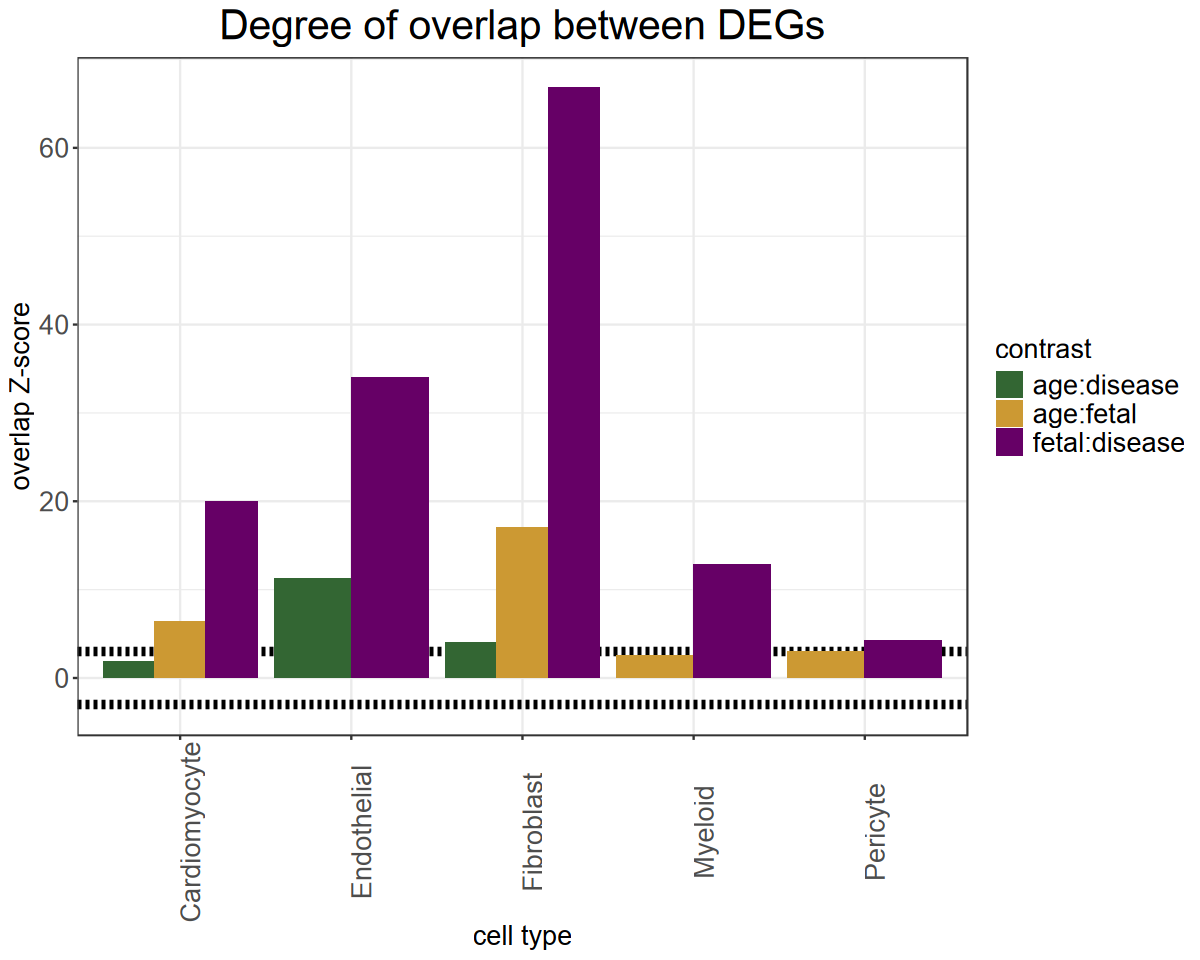

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)

p1 <- ggplot(data = Z_scores_combined, mapping = aes(x = cell_type, 
                                               y = Z_scores,
                                               fill = contrast)) + 
geom_hline(yintercept = c(-3, 3), linetype = "dashed", color = "black", linewidth = 2) +  # add horizontal dotted lines
geom_bar(stat = "identity", position = position_dodge(width = 0.9)) + theme_bw() + 
theme(legend.text = element_text(size = 16), 
         legend.title = element_text(size = 16), 
         plot.title = element_text(size = 24, hjust = 0.5), 
         axis.title.x = element_text(size = 16),
         axis.title.y = element_text(size = 16),
         axis.text.x = element_text(size = 16, angle = 90),
         axis.text.y = element_text(size = 16)) + labs(x = "cell type", y = "overlap Z-score",
                                                       title = "Degree of overlap between DEGs") +
         scale_fill_manual(values = c("age:disease" = c("#336633"), 
                               "age:fetal" = "#CC9933", 
                               "fetal:disease" = "#660066")) 

p1 

ggsave(plot = p1, filename = paste0(plots_dir, "all_contrasts_Z_score_DARs.pdf"), width = 8, height = 6)